In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecommunications/teleCust1000t.csv


# Importing dataset

In [2]:
df = pd.read_csv("../input/telecommunications/teleCust1000t.csv")

# Dependent and Indepent variables

In [3]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']]
y = df['custcat']

missing_cols = [col for col in df.columns if df[col].isnull().any()]
print(missing_cols)

[]


# Feature Scaling

In [4]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

# Splitting training and testing dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


# Modelling with k from 1 to 6 and then storing the accuracy in mean_acc and std_acc

In [6]:
Ks = 6
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))
for n in range(1, Ks):
    # Train Model
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n - 1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n - 1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

print(mean_acc)

[0.3   0.29  0.315 0.32  0.315]


# Plot  model accuracy for different number of Neighbours

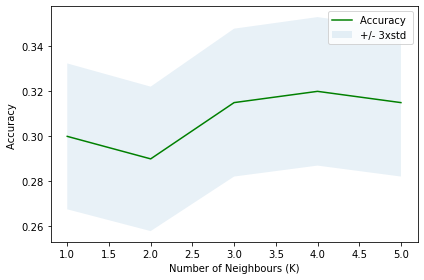

In [7]:
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [8]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax() + 1)


The best accuracy was with 0.32 with k= 4
